In [34]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from itertools import combinations
from sklearn.metrics import explained_variance_score, r2_score

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg1 = linear_model.BayesianRidge()
reg2 = linear_model.RANSACRegressor()
reg3 = linear_model.LassoLars(alpha=.1)
reg4 = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg5 = linear_model.ElasticNetCV()
reg6 = linear_model.SGDRegressor()
reg7 = linear_model.PassiveAggressiveRegressor()
reg8 = linear_model.TheilSenRegressor()
reg9 = linear_model.HuberRegressor()
from sklearn import svm
clf = svm.SVR(C=1.0, epsilon=0.2)
models = [clf, reg, reg1,reg3,reg5]

models_desc = [x.__class__.__name__ for x in models]

# Getting the Data

In [35]:
df = pd.read_csv('../datasets/UnnormalizedCrimeData.csv');
df = df.replace('?',np.NAN)

goal_features = ['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies','robbbPerPop',
                 'assaults', 'assaultPerPop', 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop',
                 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop', 'nonViolPerPop']

non_predictive_features = ['communityname', 'state', 'countyCode', 'communityCode', 'fold']

features = [x for x in df.columns if x not in goal_features and x not in non_predictive_features]
len(features)

124

In [36]:
def drop_rows_with_null_goal_feature(old_df, feature):
    new_df = old_df.dropna(subset=[feature])
    return new_df

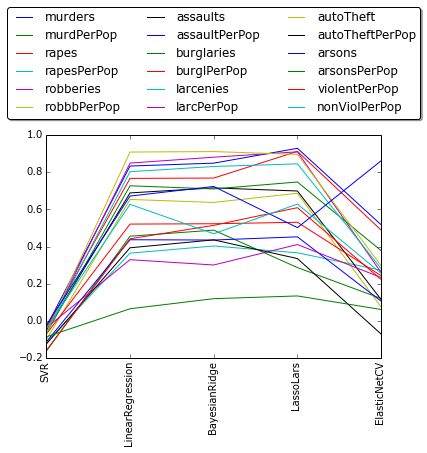

In [37]:
x_count = 0

r2_scores =[]
for goal_feature in goal_features:
    r2_scores.append([])
    goal_df = drop_rows_with_null_goal_feature(df, goal_feature)
    
    goal_df[[goal_feature]] = goal_df[[goal_feature]].apply(pd.to_numeric)
    imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imr = imr.fit(goal_df[features])
    imputed_data = imr.transform(goal_df[features]);

    df_X_train, df_X_test, df_y_train, df_y_test = \
            train_test_split(imputed_data, goal_df[goal_feature], test_size=0.2)
    y_count = 0
    for model in models:
        model.fit(df_X_train, df_y_train)
        r2_scores[-1].append(r2_score(df_y_test, model.predict(df_X_test)))
    #print r2_scores
    
    xxx = [ct+1 for ct in range(len(models))]
    plt.plot(xxx, r2_scores[-1],label = goal_feature)
    #plt.plot(models_desc,r2_scores[-1])
    plt.xticks(xxx, models_desc, rotation='vertical')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.6),
          ncol=3, fancybox=True, shadow=True)
    
    
    

In [38]:
bayesian_score = [r2_scores[ip][2] for ip in range(len(r2_scores))]

arr = np.array(bayesian_score)
order = arr.argsort()



In [39]:
print "BayesianRidge Predictability:\n\n"

for i in order:
    print str(goal_features[i]) + " " + str(round(bayesian_score[i],3)*100)

BayesianRidge Predictability:


arsonsPerPop 12.0
larcPerPop 30.1
rapesPerPop 40.3
assaultPerPop 43.5
autoTheftPerPop 43.6
nonViolPerPop 46.9
murdPerPop 48.9
violentPerPop 51.4
burglPerPop 52.3
robbbPerPop 63.8
burglaries 71.0
assaults 71.6
arsons 72.3
rapes 76.9
larcenies 83.1
murders 84.9
robberies 88.1
autoTheft 91.1
